# Make of a neural network with numpy

### Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# Importing the separate module containing the network methods
import NetworkModule as nm

/tmp/ipykernel_18627/3197861085.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


Using ndarrays as Tensors, adding the typing library to be more explicit and creating a new type "Func" which is a function taking a Tensor as argument and returning a Tensor

In [2]:
from numpy import ndarray as Tensor

from typing import (Tuple, Callable, Sequence)
Func = Callable[[Tensor], Tensor]

### Extracting the data from the dataset

In [3]:
# Number of data points / events taken from the dataset 
# For Training
lines_train: int = 20000
# For Validation and Testing
lines_val: int = 10000

# Different types of dataset for training, validation and testing
dataset_train = pd.read_csv('dataset.csv', usecols=np.arange(0,12), nrows=lines_train)
# The data is normalized to avoid variables with high values
norm_dataset_train = (dataset_train.values - np.min(dataset_train.values)) / (np.max(dataset_train.values) - np.min(dataset_train.values))

dataset_val = pd.read_csv('dataset.csv', usecols=np.arange(0,12), skiprows=lines_train+1, nrows=lines_val)
norm_dataset_val = (dataset_val.values - np.min(dataset_val.values)) / (np.max(dataset_val.values) - np.min(dataset_val.values))

dataset_test = pd.read_csv('dataset.csv', usecols=np.arange(0,12), skiprows=lines_train+lines_val+1, nrows=lines_val)
norm_dataset_test = (dataset_test.values - np.min(dataset_test.values)) / (np.max(dataset_test.values) - np.min(dataset_test.values))

# Labels for training, validation and testing
labels_train = pd.read_csv('dataset.csv', usecols=[13], nrows=lines_train) # labels in column 13
labels_val = pd.read_csv('dataset.csv', usecols=[13], skiprows=lines_train+1, nrows=lines_val)
labels_test = pd.read_csv('dataset.csv', usecols=[13], skiprows=lines_train+lines_val+1, nrows=lines_val)

# New labels for binary classification
# Before : signal has label 0, background has label 1 or 2
# After : signal has label 1, background has label 0
bin_labels_train = np.where(labels_train.values == 0, 1, 0)
bin_labels_val = np.where(labels_val.values == 0, 1, 0)
bin_labels_test = np.where(labels_test.values == 0, 1, 0)

# Predictions from a previous work using the same dataset
article_val = pd.read_csv('dataset.csv', usecols=[12], skiprows=lines_train+1, nrows=lines_val)
article_test = pd.read_csv('dataset.csv', usecols=[12], skiprows=lines_train+lines_val+1, nrows=lines_val)

### Training different networks

In [4]:
seed_value: int = np.random.randint(1, 99) # random seed to initialize the parameters
# The seed used to get the results in the report is 42
print("The seed used: ",seed_value)
batch_num: int = 1000 # batch_size
epochs: int = 2000 # number of epochs for the training

# Structure of the neural networks : combinaison of linear and activation layers
# 2 instances to initialize the parameters before training
NetCE = nm.NeuralNet([
    nm.Linear(input_size=12, output_size=9, Seed=seed_value),
    nm.Activation(nm.tanh, nm.tanh_prime),
    nm.Linear(input_size=9, output_size=3, Seed=seed_value),
    nm.Activation(nm.tanh, nm.tanh_prime),
    nm.Linear(input_size=3, output_size=9, Seed=seed_value),
    nm.Activation(nm.tanh, nm.tanh_prime),
    nm.Linear(input_size=9, output_size=1, Seed=seed_value),
    nm.Activation(nm.sigmoid, nm.sigmoid_prime),
])

NetMSE = nm.NeuralNet([
    nm.Linear(input_size=12, output_size=9, Seed=seed_value),
    nm.Activation(nm.tanh, nm.tanh_prime),
    nm.Linear(input_size=9, output_size=3, Seed=seed_value),
    nm.Activation(nm.tanh, nm.tanh_prime),
    nm.Linear(input_size=3, output_size=9, Seed=seed_value),
    nm.Activation(nm.tanh, nm.tanh_prime),
    nm.Linear(input_size=9, output_size=1, Seed=seed_value),
    nm.Activation(nm.sigmoid, nm.sigmoid_prime),
])

The seed used:  89


In [5]:
# Training and validation using the binary cross entropy loss (CE)

Train_res_CE: Tuple = NetCE.train(inputs=norm_dataset_train, targets=bin_labels_train,
                                       val_inputs=norm_dataset_val, val_targets=bin_labels_val,
                                       loss=nm.BinCrossEntropy(), iterator=nm.BatchIterator(batch_size=batch_num), num_epochs=epochs)

Val_res_CE: Tuple = NetCE.validate(inputs=norm_dataset_val, targets=bin_labels_val,
                                        loss=nm.BinCrossEntropy(), iterator=nm.BatchIterator(batch_size=batch_num))

# Training
Epoch =    0 Loss = 0.839 Acc = 67.705
# Validation
Epoch =    0 Loss = 0.879 Acc = 67.250
--------------------------------------
# Training
Epoch =  100 Loss = 0.270 Acc = 90.450
# Validation
Epoch =  100 Loss = 0.279 Acc = 89.830
--------------------------------------
# Training
Epoch =  200 Loss = 0.178 Acc = 93.290
# Validation
Epoch =  200 Loss = 0.198 Acc = 91.920
--------------------------------------
# Training
Epoch =  300 Loss = 0.147 Acc = 94.245
# Validation
Epoch =  300 Loss = 0.205 Acc = 92.500
--------------------------------------
# Training
Epoch =  400 Loss = 0.141 Acc = 94.730
# Validation
Epoch =  400 Loss = 0.212 Acc = 92.560
--------------------------------------
# Training
Epoch =  500 Loss = 0.140 Acc = 94.980
# Validation
Epoch =  500 Loss = 0.196 Acc = 92.550
--------------------------------------
# Training
Epoch =  600 Loss = 0.133 Acc = 95.105
# Validation
Epoch =  600 Loss = 0.230 Acc = 92.520
--------------------------------------
# Training
Ep

In [6]:
# Training and validation using the mean square error loss (MSE)

Train_res_MSE: Tuple = NetMSE.train(inputs=norm_dataset_train, targets=bin_labels_train,
                                       val_inputs=norm_dataset_val, val_targets=bin_labels_val,
                                       loss=nm.MeanSquareError(), iterator=nm.BatchIterator(batch_size=batch_num), num_epochs=epochs)

Val_res_MSE: Tuple = NetMSE.validate(inputs=norm_dataset_val, targets=bin_labels_val,
                                        loss=nm.MeanSquareError(), iterator=nm.BatchIterator(batch_size=batch_num))

# Training
Epoch =    0 Loss = 0.309 Acc = 67.705
# Validation
Epoch =    0 Loss = 1.016 Acc = 67.250
--------------------------------------
# Training
Epoch =  100 Loss = 0.210 Acc = 67.705
# Validation
Epoch =  100 Loss = 0.613 Acc = 67.250
--------------------------------------
# Training
Epoch =  200 Loss = 0.102 Acc = 89.130
# Validation
Epoch =  200 Loss = 0.362 Acc = 88.700
--------------------------------------
# Training
Epoch =  300 Loss = 0.068 Acc = 91.620
# Validation
Epoch =  300 Loss = 0.260 Acc = 90.550
--------------------------------------
# Training
Epoch =  400 Loss = 0.056 Acc = 92.605
# Validation
Epoch =  400 Loss = 0.228 Acc = 91.600
--------------------------------------
# Training
Epoch =  500 Loss = 0.051 Acc = 93.415
# Validation
Epoch =  500 Loss = 0.213 Acc = 92.080
--------------------------------------
# Training
Epoch =  600 Loss = 0.055 Acc = 93.910
# Validation
Epoch =  600 Loss = 0.183 Acc = 92.220
--------------------------------------
# Training
Ep

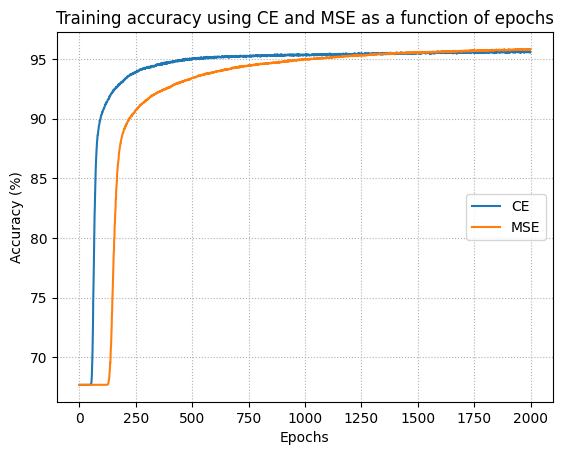

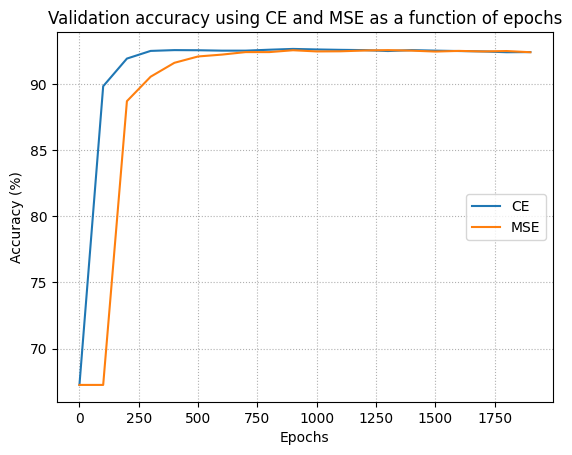

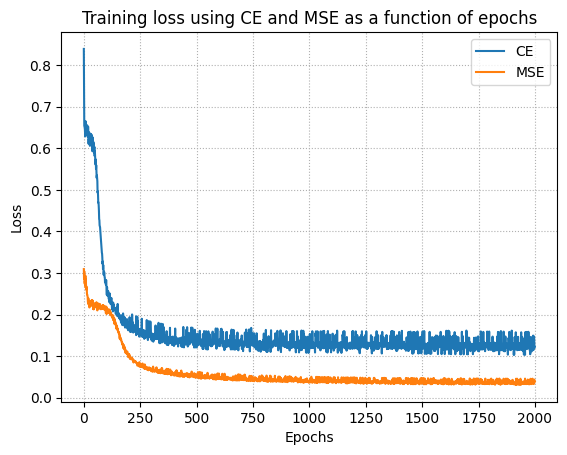

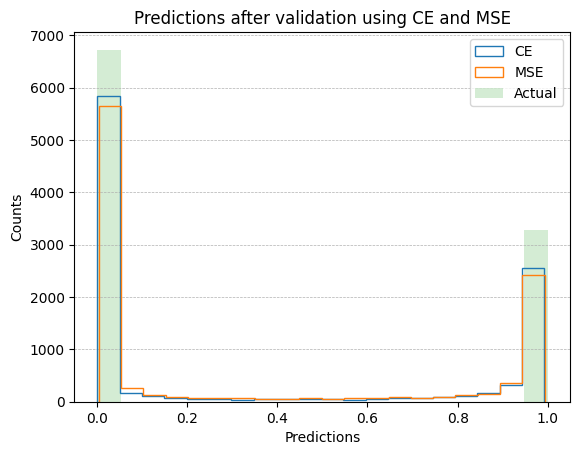

In [7]:
# Plots of training accuracy, validation accuracy, training loss and predictions using CE and MSE

# Training accuracy
fig = plt.figure()
plt.plot(Train_res_CE[1], label='CE')
plt.plot(Train_res_MSE[1], label='MSE')
plt.ylabel('Accuracy (%)')
plt.xlabel('Epochs')
plt.title('Training accuracy using CE and MSE as a function of epochs')
plt.grid(linestyle=':')
plt.legend(loc='center right')
plt.show()

# Validation accuracy
fig = plt.figure()
plt.plot(np.arange(0, epochs, 100), Train_res_CE[5], label='CE')
plt.plot(np.arange(0, epochs, 100), Train_res_MSE[5], label='MSE')
plt.ylabel('Accuracy (%)')
plt.xlabel('Epochs')
plt.title('Validation accuracy using CE and MSE as a function of epochs')
plt.grid(linestyle=':')
plt.legend(loc='center right')
plt.show()

# Training loss
fig = plt.figure()
plt.plot(Train_res_CE[0], label='CE')
plt.plot(Train_res_MSE[0], label='MSE')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.title('Training loss using CE and MSE as a function of epochs')
plt.grid(linestyle=':')
plt.legend()
plt.show()

# Predictions compared to actual labels
fig = plt.figure()
plt.hist(Val_res_CE[3], histtype='step', bins=20, label='CE')
plt.hist(Val_res_MSE[3], histtype='step', bins=20, label='MSE')
plt.hist(Val_res_CE[2], histtype='bar', bins=19, alpha=0.2, label='Actual')
plt.xlabel('Predictions')
plt.ylabel('Counts')
plt.title('Predictions after validation using CE and MSE')
plt.grid(axis='y', linestyle='--', linewidth='0.5')
plt.legend()
plt.show()

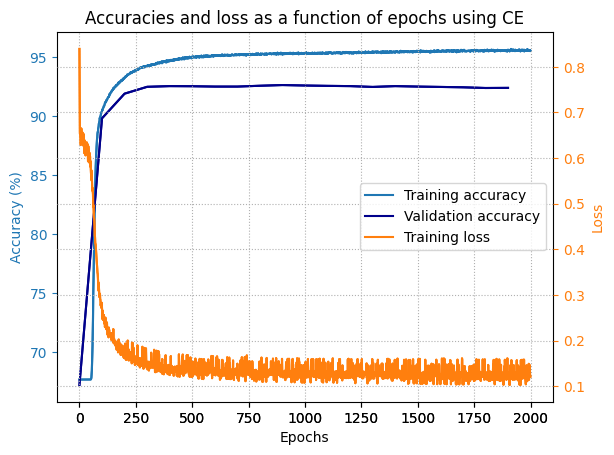

In [8]:
# Plots of training accuracy, validation accuracy and training loss using CE

fig=plt.figure()
ax1=fig.add_subplot(111)
ax2=fig.add_subplot(111, frame_on=False)

ax1.set_title('Accuracies and loss as a function of epochs using CE')

ax1.plot(Train_res_CE[1], color='C0')
ax1.plot(np.arange(0, epochs, 100), Train_res_CE[5], color = 'darkblue')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Accuracy (%)', color='C0')
ax1.tick_params(axis='y', colors='C0')

ax2.plot(Train_res_CE[0], color='C1') 
ax2.set_ylabel('Loss', color='C1') 
ax2.yaxis.set_label_position('right') 
ax2.yaxis.tick_right()
ax2.tick_params(axis='y', colors='C1')

l1,=ax1.plot(Train_res_CE[1], color='C0')
l2,=ax1.plot(np.arange(0, epochs, 100), Train_res_CE[5], color='darkblue')
l3,=ax2.plot(Train_res_CE[0], color='C1')
plt.grid(linestyle=':')
plt.legend([l1, l2, l3], ['Training accuracy', 'Validation accuracy', 'Training loss'], loc='center right')

plt.show()

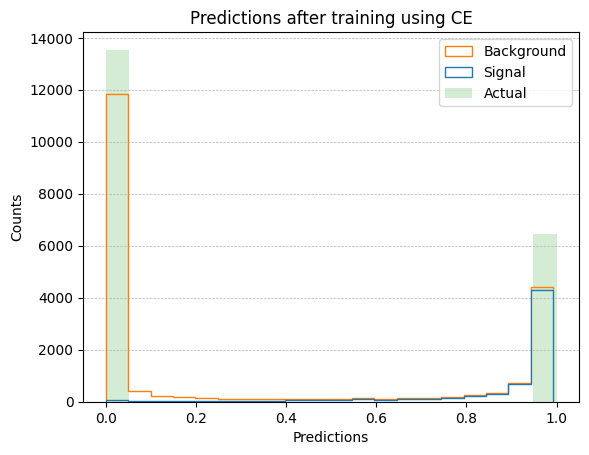

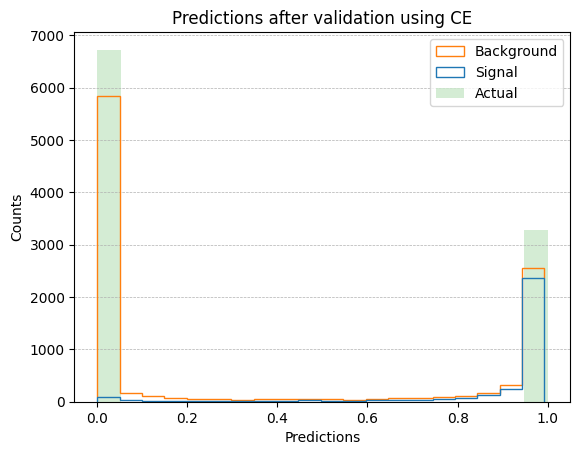

In [9]:
# Plots of predictions after training and validation with separation of signal and background using CE

# Separate signal and background events for training
Pred_back_t: Sequence = []
Pred_sig_t: Sequence = []

for i in range(0, len(Train_res_CE[2])):
    if Train_res_CE[2][i] == 0:
        Pred_back_t.append(Train_res_CE[3][i][0])
    else:
        Pred_sig_t.append(Train_res_CE[3][i][0])

Pred_back_t_arr = np.array(Pred_back_t)
Pred_sig_t_arr = np.array(Pred_sig_t)

# Separate signal and background events for validation
Pred_back: Sequence = []
Pred_sig: Sequence = []

for i in range(0, len(Val_res_CE[2])):
    if Val_res_CE[2][i] == 0:
        Pred_back.append(Val_res_CE[3][i][0])
    else:
        Pred_sig.append(Val_res_CE[3][i][0])

Pred_back_arr = np.array(Pred_back)
Pred_sig_arr = np.array(Pred_sig)

# Training predictions
fig = plt.figure()
plt.hist([Pred_sig_t_arr, Pred_back_t_arr], histtype='step', stacked=True, bins=20,
         label=['Signal', 'Background'])
plt.hist(Train_res_CE[2], histtype='bar', bins=19, alpha=0.2, label='Actual')
plt.xlabel('Predictions')
plt.ylabel('Counts')
plt.title('Predictions after training using CE')
plt.grid(axis='y', linestyle='--', linewidth='0.5')
plt.legend()
plt.show()

# Validation predictions
fig = plt.figure()
plt.hist([Pred_sig_arr, Pred_back_arr], histtype='step', stacked=True, bins=20,
         label=['Signal', 'Background'])
plt.hist(Val_res_CE[2], histtype='bar', bins=19, alpha=0.2, label='Actual')
plt.xlabel('Predictions')
plt.ylabel('Counts')
plt.title('Predictions after validation using CE')
plt.grid(axis='y', linestyle='--', linewidth='0.5')
plt.legend()
plt.show()

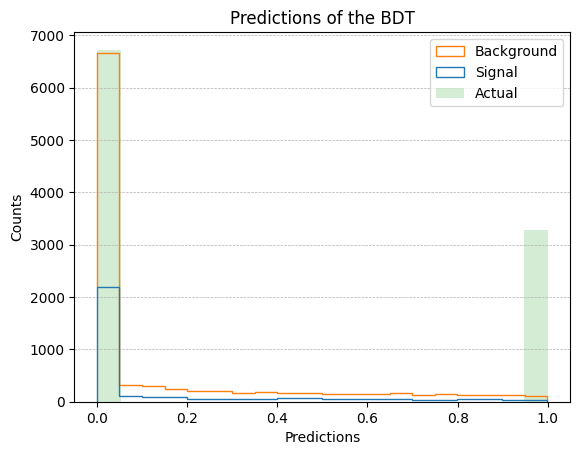

In [10]:
# Plot of predictions of the BDT

# Separate signal and background events
Pred_back_art: Sequence = []
Pred_sig_art: Sequence = []

for i in range(0, len(Val_res_CE[2])):
    if Val_res_CE[2][i] == 0:
        Pred_back_art.append(article_val.values[i][0])
    else:
        Pred_sig_art.append(article_val.values[i][0])

Pred_b_arr_art = np.array(Pred_back_art)
Pred_s_arr_art = np.array(Pred_sig_art)

fig = plt.figure()
plt.hist([Pred_s_arr_art, Pred_b_arr_art], histtype='step', stacked=True, bins=20,
         label=['Signal', 'Background'])
plt.hist(Val_res_CE[2], histtype='bar', bins=19, alpha=0.2, label='Actual')
plt.xlabel('Predictions')
plt.ylabel('Counts')
plt.title('Predictions of the BDT')
plt.grid(axis='y', linestyle='--', linewidth='0.5')
plt.legend()
plt.show()

### Assessing a good cut value for accuracy computation

In [11]:
# Cut : value between 0 and 1 determining which predictions are signal or background
# For example, with a cut of 0.2, all predictions above 0.2 are considered signal, the other background

cut_range = np.arange(0.1, 1, 0.1)

Acc_cut_tot: Sequence = []
Acc_cut_back: Sequence = []
Acc_cut_sig: Sequence = []
Acc_cut_article: Sequence = []

# Validation for every cut value
for cut in cut_range:

    Val_res_c: Tuple = NetCE.validate(inputs=norm_dataset_val, targets=bin_labels_val,
                                            loss=nm.BinCrossEntropy(), iterator=nm.BatchIterator(batch_size=batch_num), cut=cut)
    
    Actual_back: Sequence = []
    Pred_back: Sequence = []
    Actual_sig: Sequence = []
    Pred_sig: Sequence = []

    # Separate signal and background events
    for i in range(0, len(Val_res_c[2])):
        if Val_res_c[2][i] == 0:
            Actual_back.append(Val_res_c[2][i])
            Pred_back.append(Val_res_c[3][i])
        else:
            Actual_sig.append(Val_res_c[2][i])
            Pred_sig.append(Val_res_c[3][i])

    Actual_back_arr = np.array(Actual_back)
    Pred_back_arr = np.array(Pred_back)
    Actual_sig_arr = np.array(Actual_sig)
    Pred_sig_arr = np.array(Pred_sig)

    # Compute accuracy for signal and background
    Round_back = np.where(Pred_back_arr >= cut, 1, 0)
    Round_sig = np.where(Pred_sig_arr >= cut, 1, 0)
    Acc_back = np.mean(Round_back==Actual_back_arr) * 100
    Acc_sig = np.mean(Round_sig==Actual_sig_arr) * 100
    
    # Compute BDT accuracy
    Round_article = np.where(article_val.values >= cut, 1, 0)
    Acc_article_val = np.mean(Round_article==bin_labels_val) * 100

    Acc_cut_tot.append(Val_res_c[1])
    Acc_cut_back.append(Acc_back)
    Acc_cut_sig.append(Acc_sig)
    Acc_cut_article.append(Acc_article_val)

    print(f'Cut = {cut:.1f}')
    print(f'Acc = {Val_res_c[1]:.3f} Acc back = {Acc_back:.3f} Acc sig = {Acc_sig:.3f}')
    print(f'Acc BDT = {Acc_article_val:.3f}')
    print("-----------------------------------------------")

Cut = 0.1
Acc = 90.450 Acc back = 87.554 Acc sig = 96.397
Acc BDT = 93.620
-----------------------------------------------
Cut = 0.2
Acc = 91.510 Acc back = 89.770 Acc sig = 95.084
Acc BDT = 90.410
-----------------------------------------------
Cut = 0.3
Acc = 91.980 Acc back = 90.900 Acc sig = 94.198
Acc BDT = 87.030
-----------------------------------------------
Cut = 0.4
Acc = 92.250 Acc back = 91.762 Acc sig = 93.252
Acc BDT = 83.910
-----------------------------------------------
Cut = 0.5
Acc = 92.360 Acc back = 92.580 Acc sig = 91.908
Acc BDT = 80.530
-----------------------------------------------
Cut = 0.6
Acc = 92.430 Acc back = 93.309 Acc sig = 90.626
Acc BDT = 77.770
-----------------------------------------------
Cut = 0.7
Acc = 92.260 Acc back = 94.112 Acc sig = 88.458
Acc BDT = 74.930
-----------------------------------------------
Cut = 0.8
Acc = 91.980 Acc back = 95.197 Acc sig = 85.374
Acc BDT = 72.360
-----------------------------------------------
Cut = 0.9
Acc = 

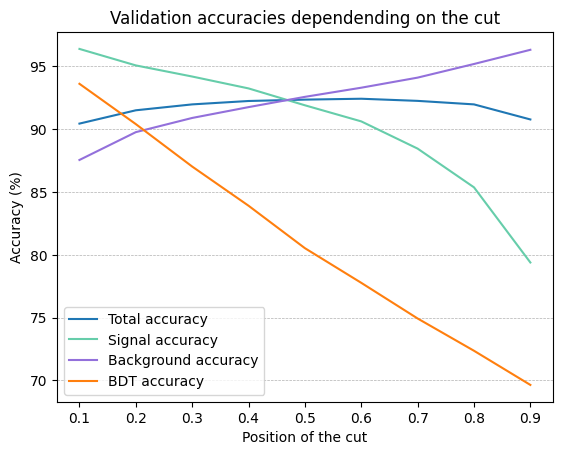

The best cut value:  0.6


In [12]:
# Plots of the total, signal and background validation accuracies compared to the BDT accuracy

fig = plt.figure()
plt.plot(cut_range, Acc_cut_tot, label='Total accuracy')
plt.plot(cut_range, Acc_cut_sig, label='Signal accuracy', color='mediumaquamarine')
plt.plot(cut_range, Acc_cut_back, label='Background accuracy', color='mediumpurple')
plt.plot(cut_range, Acc_cut_article, label='BDT accuracy')
plt.title('Validation accuracies dependending on the cut')
plt.xlabel('Position of the cut')
plt.ylabel('Accuracy (%)')
plt.grid(axis='y', linestyle='--', linewidth='0.5')
plt.legend()
plt.show()

# Compute the accuracy of the BDT with the cut giving the highest accuracy (0.1)
Round_article_test = np.where(article_test.values >= 0.1, 1, 0)
Acc_article = np.mean(Round_article_test==bin_labels_test) * 100

# Get the cut giving the maximum total accuracy
best_cut = cut_range[np.argmax(Acc_cut_tot)]
print("The best cut value: ",best_cut)

### Ploting the signal against background distribution for specific input variables

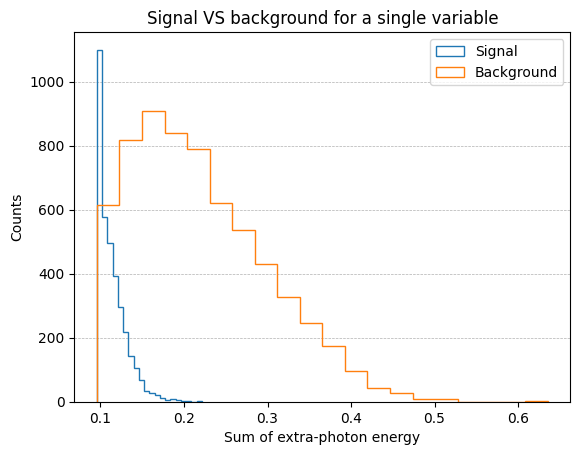

In [13]:
# Plot to assess whether a physical variable allows to discriminate signal and background or not

In_back: Sequence = []
In_sig: Sequence = []

num_col = 0 # number between 0 and 11
datacol = ['Sum of extra-photon energy', 'Number of extra tracks', 'Sum of missing momentum and energy',
           'cos(thrust axis of the signal kaon, thrust axis of other objects)', 'Modified Fox-Wolfram moment Hso_22', 'Recoil mass',
           'Probability to reject fake kaons coming from D+', 'Signal probability for the Btag', 'Modified Fox-Wolfram moment Hso_02',
           'Modified Fox-Wolfram moment Hoo_0', 'Probability to reject fake kaons coming from D0', 'Azimuthal angle between signal kaon and missing-momentum vector']

# Separate signal and background events
for i in range(0, len(Val_res_CE[3])):
    if np.round(Val_res_CE[3][i]) == 0:
        In_back.append(Val_res_CE[4][i])
    else:
        In_sig.append(Val_res_CE[4][i])

In_back_arr = np.array(In_back)
In_sig_arr = np.array(In_sig)

fig = plt.figure()
plt.hist(In_sig_arr[:, num_col], histtype='step', bins=20, label='Signal')
plt.hist(In_back_arr[:, num_col], histtype='step', bins=20, label='Background')
plt.title('Signal VS background for a single variable')
plt.xlabel(datacol[num_col])
plt.ylabel('Counts')
plt.grid(axis='y', linestyle='--', linewidth='0.5')
plt.legend()
plt.show()

### Final test accuracy

In [14]:
# Final test to compare the accuracy of our network and the BDT from the article

Acc_tot: Sequence = []
Acc_back_tot: Sequence = []
Acc_sig_tot: Sequence =[]
Loss_tot: Sequence = []
Pred_tot: Sequence = []

# Compute the accuracy for different random initializations
for N in range(20):

    net = nm.NeuralNet([
        nm.Linear(input_size=12, output_size=9),
        nm.Activation(nm.tanh, nm.tanh_prime),
        nm.Linear(input_size=9, output_size=3),
        nm.Activation(nm.tanh, nm.tanh_prime),
        nm.Linear(input_size=3, output_size=9),
        nm.Activation(nm.tanh, nm.tanh_prime),
        nm.Linear(input_size=9, output_size=1),
        nm.Activation(nm.sigmoid, nm.sigmoid_prime),
    ])

    Train_res: Tuple = net.train(inputs=norm_dataset_train, targets=bin_labels_train,
                                    val_inputs=norm_dataset_val, val_targets=bin_labels_val,
                                    loss=nm.BinCrossEntropy(), iterator=nm.BatchIterator(batch_size=batch_num), num_epochs=1000, cut=best_cut, Print=False)
   
    # Using the test dataset and the best cut value
    Test_res: Tuple = net.validate(inputs=norm_dataset_test, targets=bin_labels_test,
                                            loss=nm.BinCrossEntropy(), iterator=nm.BatchIterator(batch_size=batch_num), cut=best_cut)
    
    Actual_back: Sequence = []
    Pred_back: Sequence = []
    Actual_sig: Sequence = []
    Pred_sig: Sequence = []

    # Separate signal and background events
    for i in range(0, len(Test_res[2])):
        if Test_res[2][i] == 0:
            Actual_back.append(Test_res[2][i])
            Pred_back.append(Test_res[3][i])
        else:
            Actual_sig.append(Test_res[2][i])
            Pred_sig.append(Test_res[3][i])

    Actual_back_arr = np.array(Actual_back)
    Pred_back_arr = np.array(Pred_back)
    Actual_sig_arr = np.array(Actual_sig)
    Pred_sig_arr = np.array(Pred_sig)

    # Compute accuracy for signal and background
    Round_back = np.where(Pred_back_arr >= best_cut, 1, 0)
    Round_sig = np.where(Pred_sig_arr >= best_cut, 1, 0)
    Acc_back = np.mean(Round_back==Actual_back_arr) * 100
    Acc_sig = np.mean(Round_sig==Actual_sig_arr) * 100
    
    Acc_tot.append(Test_res[1])
    Acc_back_tot.append(Acc_back)
    Acc_sig_tot.append(Acc_sig)
    Loss_tot.append(Test_res[0])
    Pred_tot.append(Test_res[3])

    # Print accuracies for each iteration
    print(f'Acc = {Test_res[1]:.3f} Acc back = {Acc_back:.3f} Acc sig = {Acc_sig:.3f}')


Acc_back_arr = np.array(Acc_back_tot)
Acc_sig_arr = np.array(Acc_sig_tot)
Acc_array = np.array(Acc_tot)

# Compute the final accuracies as the mean on the iterations
Acc_final = np.mean(Acc_array)
Acc_back_final = np.mean(Acc_back_arr)
Acc_sig_final = np.mean(Acc_sig_arr)

# Compute the standard deviation
Acc_fin_dev = np.std(Acc_array)
Acc_back_dev = np.std(Acc_back_arr)
Acc_sig_dev = np.std(Acc_sig_arr)

print("---------------------Means---------------------")
print(f'Acc = {Acc_final:.3f} ' + u"\u00B1" + f' {Acc_fin_dev:.3f} Acc back = {Acc_back_final:.3f} ' 
      + u"\u00B1" + f' {Acc_back_dev:.3f} Acc sig = {Acc_sig_final:.3f} ' + u"\u00B1" + f' {Acc_sig_dev:.3f}')
print(f'Acc BDT = {Acc_article:.3f}')

Acc = 67.710 Acc back = 100.000 Acc sig = 0.000
Acc = 89.800 Acc back = 97.918 Acc sig = 72.778
Acc = 91.520 Acc back = 96.574 Acc sig = 80.923
Acc = 92.470 Acc back = 96.057 Acc sig = 84.949
Acc = 85.070 Acc back = 99.099 Acc sig = 55.652
Acc = 84.870 Acc back = 99.247 Acc sig = 54.723
Acc = 92.270 Acc back = 96.515 Acc sig = 83.369
Acc = 88.840 Acc back = 98.435 Acc sig = 68.721
Acc = 89.920 Acc back = 97.593 Acc sig = 73.831
Acc = 92.840 Acc back = 93.915 Acc sig = 90.585
Acc = 67.710 Acc back = 100.000 Acc sig = 0.000
Acc = 82.170 Acc back = 99.424 Acc sig = 45.989
Acc = 89.350 Acc back = 98.021 Acc sig = 71.168
Acc = 89.440 Acc back = 97.888 Acc sig = 71.725
Acc = 90.610 Acc back = 97.386 Acc sig = 76.401
Acc = 92.420 Acc back = 92.335 Acc sig = 92.598
Acc = 89.110 Acc back = 98.154 Acc sig = 70.146
Acc = 88.530 Acc back = 98.449 Acc sig = 67.730
Acc = 87.250 Acc back = 98.612 Acc sig = 63.425
Acc = 88.020 Acc back = 98.346 Acc sig = 66.367
---------------------Means--------------